# **Gens de Confiance Data Exploration**

In [ ]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
import pyarrow
import google
credentials,project_id = google.auth.default()
bqclient = bigquery.Client(credentials=credentials, project='project')

### **Data Import**

In [74]:
import_path_ads= "C:/Users//Notebook Python/gdc/ads.csv"
import_path_ads_transaction= "C:/Users/Notebook Python/gdc/ads_transaction.csv"
import_path_referrals= "C:/Users/Notebook Python/gdc/referrals.csv"
import_path_users= "C:/Users/Notebook Python/gdc/users.csv"

df_ads=pd.read_csv(import_path_ads, sep=",",encoding = "utf-8")
df_ads_transaction=pd.read_csv(import_path_ads_transaction, sep=",",encoding = "utf-8")
df_referrals=pd.read_csv(import_path_referrals, sep=",",encoding = "utf-8")
df_users=pd.read_csv(import_path_users, sep=",",encoding = "utf-8")
#df_ads.info()
#df_ads_transaction.info()
#df_referrals.info()
#df_users.info()

### **Data Quality**

 **ADS**

In [53]:
df_ads['Unnamed: 0'].equals(df_ads['id']) #first column Index is equal to 'id' column, so we delete it with the empty 'deleted_at' column
df_ads=df_ads.drop(['Unnamed: 0','deleted_at'], axis=1)
#Modalities exploration link to data quality
df_ads['title'].unique()
# convert the 'created_at' column to datetime format
df_ads['created_at']= pd.to_datetime(df_ads['created_at'])
#Replace F by T 
df_ads['title'] = df_ads['title'].str.replace('F1','T1')
df_ads['title'] = df_ads['title'].str.replace('F2','T2')
df_ads['title'] = df_ads['title'].str.replace('F3','T3')
#Replace all modalities real estate to one 'RealEstate'
df_ads['category'] = df_ads['category'].str.replace('realestate','RealEstate').replace('REAL_ESTATE','RealEstate').replace('relestate','RealEstate')
#Adding a created_year variable
df_ads['created_year'] = df_ads['created_at'].dt.year 
#Adding 3 dummies variable link to the type of title
df_ads['FLG_LOCATION']=df_ads["title"].str.contains("Loue") == 1
df_ads['FLG_VENTE']=df_ads["title"].str.contains("Vends") == 1
df_ads['FLG_RECHERCHE']=df_ads["title"].str.contains("Recherche") == 1

 **ADS Transaction**

In [54]:
# convert the 'created_at' column to datetime format
df_ads_transaction['created_at']= pd.to_datetime(df_ads_transaction['created_at'])
#Adding a created_year variable
df_ads_transaction['created_year'] = df_ads_transaction['created_at'].dt.year 

 **Referrals**

In [55]:
# delete the empty 'deleted_at' column
df_referrals=df_referrals.drop(['deleted_at'], axis=1)
# convert the 'created_at' column to datetime format
df_referrals['created_at']= pd.to_datetime(df_referrals['created_at'])
#Adding a created_year variable
df_referrals['created_year'] = df_referrals['created_at'].dt.year 

 **Users**

In [56]:
df_users['Unnamed: 0'].equals(df_users['id']) 
#First column with no name is equal to 'id' column, so we delete it
df_users=df_users.drop(['Unnamed: 0'], axis=1)
# convert the 'created_at' column to datetime format
df_users['created_at']= pd.to_datetime(df_users['created_at'])
df_users['sex'].unique()
#Replace all modalities M./Mr./M estate to one 'M'
df_users['sex'] = df_users['sex'].str.replace('Mr','M').replace('M.','M')
#Adding a created_year variable
df_users['created_year'] = df_users['created_at'].dt.year 

### **Data Exploration**

In [113]:
df_ads.describe()

,Unnamed: 0,owner_id,price,deleted_at,id
count,40000.00000,40000.000000,4.000000e+04,0.0,40000.00000
mean,19999.50000,15184.559275,1.378699e+05,NaN,19999.50000
std,11547.14972,8650.421587,2.107624e+05,NaN,11547.14972
min,0.00000,0.000000,1.000000e+00,NaN,0.00000
25%,9999.75000,7721.250000,9.760000e+02,NaN,9999.75000
50%,19999.50000,15254.000000,8.840000e+03,NaN,19999.50000
75%,29999.25000,22725.000000,2.773108e+05,NaN,29999.25000
max,39999.00000,29998.000000,1.102263e+06,NaN,39999.00000


In [339]:
df_ads['owner_id'].nunique() #14 313 unique owners
df_ads['title'].nunique()#30 title unique

30

In [367]:
#Price per Category
df_ads.groupby('category')['price'].agg(['count','min','max','mean'])

,count,min,max,mean
category,,,,
RealEstate,20000,1,1102263,268234.66640
vehicle,20000,455,20003,7505.13995


In [48]:
#Price per title
df_ads.groupby('title')['price'].agg(['count','min','max','mean'])

,count,min,max,mean
title,,,,
Loue Appartement,670,18,1916,998.310448
Loue Camping-Car,2344,477,915,699.867747
Loue Chateau,670,1,1971,1000.689552
Loue Maison,622,1,1786,998.155949
Loue Moto,2326,493,955,701.327171
Loue T1,1395,1,2110,998.941219
Loue T2,1334,1,1987,993.639430
Loue T3,1314,1,2149,1007.805175
Loue T4,649,1,1955,1004.183359


            count
created_at       
2017-01-01     42
2017-01-02     25
2017-01-03     32
2017-01-04     28
2017-01-05     40
...           ...
2019-12-23     41
2019-12-24     45
2019-12-25     41
2019-12-26     49
2019-12-27     40

[972 rows x 1 columns]


<AxesSubplot:xlabel='created_at'>

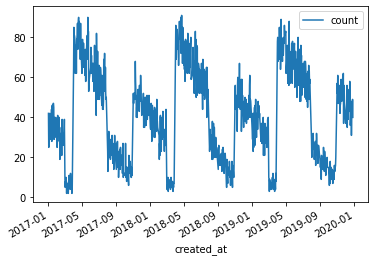

In [64]:
#Period of time for ads
tab=df_ads.groupby('created_at')['title'].agg(['count'])
print(tab)
tab.plot()

In [348]:
print(f"Nb ad owner : {df_ads_transaction['ad_owner_id'].nunique()} ")
print(f"Nb buyer owner : {df_ads_transaction['buyer_user_id'].nunique()} ")
print(f"Nb ad id : {df_ads_transaction['ad_id'].nunique()} ")
#1.2 ad per owner
#1.1 buyer per owner

Nb ad owner : 5361 
Nb buyer owner : 5956 
Nb ad id : 6645 


In [349]:
df_ads_transaction.groupby('created_at')['sold_price'].agg(['count','min','max','mean'])

,count,min,max,mean
created_at,,,,
2017-01-10,2,577.155368,1283.181150,930.168259
2017-01-11,6,580.043961,578837.610213,244038.307303
2017-01-12,7,791.512220,254351.021418,66945.480337
2017-01-13,6,784.033208,346389.332014,151593.220018
2017-01-14,6,654.846101,524367.358753,228515.043628
...,...,...,...,...
2020-01-02,8,665.514701,214076.299106,34005.234374
2020-01-03,9,555.538035,566345.265296,112103.235176
2020-01-04,5,583.572670,291895.733702,99465.486672


In [76]:
print(f"Nb referrer : {df_referrals['referrer_user_id'].nunique()} ")
print(f"Nb referree : {df_referrals['referree_user_id'].nunique()} ")

Nb referrer : 23543 
Nb referree : 23523 


In [351]:
df_users.describe()

,id,age,lat,long
count,30000.000000,30000.000000,24000.000000,24000.000000
mean,14999.500000,46.586200,47.278075,1.922248
std,8660.398374,18.218493,1.613103,2.802307
min,0.000000,15.000000,42.391034,-5.420708
25%,7499.750000,32.000000,46.064778,-0.818976
50%,14999.500000,47.000000,47.253379,2.366306
75%,22499.250000,60.000000,48.485534,4.296871
max,29999.000000,82.000000,52.984471,8.453112


In [352]:
df_users['birthdate'].value_counts().sort_index()

1941-12-16    1
1941-12-18    2
1941-12-19    2
1941-12-21    2
1941-12-22    2
             ..
2005-04-12    2
2005-04-13    3
2005-04-14    1
2005-04-15    1
2005-04-16    2
Name: birthdate, Length: 16357, dtype: int64

In [355]:
df_users.head()

,id,age,birthdate,city,created_at,sex,lat,long,password,utm_source,utm_medium,utm_campaign,firstname,lastname,user_agent,misc
0,0,46,1976-04-07,Varen,2018-03-20,F,NaN,NaN,40be4e59b9a2a2b5dffb918c0e86b3d7,NaN,ad,referral.referBack,Joseph,Rodrigues,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"{'phone_number': '+33 3 68 24 13 43', 'connect..."
1,1,47,1975-02-13,Marseille,2018-03-16,NaN,46.963451,-1.349830,d0763edaa9d9bd2a9516280e9044d885,facebook,emails,referral.referBack,Arnaude,Guillot,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,"{'phone_number': '+33 2 27 12 58 16', 'connect..."
2,2,51,1971-07-07,Nantes,2019-02-13,F,NaN,NaN,d8578edf8458ce06fbc5bb76a58c5ca4,mailing,emails,ad.recap,Dorothée,Rolland,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_3 like M...,"{'phone_number': '03 01 70 81 31', 'connection..."
3,3,21,1999-07-08,Voissay,2016-12-11,F,50.739894,-2.132050,40be4e59b9a2a2b5dffb918c0e86b3d7,facebook,emails,NaN,Tristan,Guillon,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,"{'phone_number': '+33 (0)3 21 16 58 63', 'conn..."
4,4,50,1972-10-14,Nantes,2019-08-09,F,47.546583,-2.595379,5f4dcc3b5aa765d61d8327deb882cf99,facebook,emails,NaN,Xavier,Benoit,Mozilla/5.0 (compatible; MSIE 5.0; Windows 95;...,"{'phone_number': '0388091037', 'connections': ..."


In [353]:
df_users['sex'].unique()

array(['F', nan, 'M'], dtype=object)

In [358]:
df_users['utm_campaign'].unique()

array(['referral.referBack', 'ad.recap', nan, 'aide-coronavirus',
       'message.reply'], dtype=object)

In [359]:
df_ads.head()

,owner_id,title,category,price,city,created_at,id
0,15167,Loue T1,RealEstate,1403,Nantes,2017-04-25,0
1,15515,Vends T3,RealEstate,431970,Thorens-Glières,2018-06-19,1
2,16496,Vends T3,RealEstate,820380,La Madeleine-sur-Loing,2019-06-24,2
3,1647,Recherche Maison,RealEstate,42499,Condren,2018-01-09,3
4,10339,Loue Maison,RealEstate,933,Laval,2019-08-11,4


In [70]:
#Average age per category
tab=pd.merge(df_ads,df_users[['id','city','age']],how="left",left_on="owner_id",right_on="id")
tab
tab.groupby('category')['age'].agg(['min','max','mean'])
#tab.groupby('title')['age'].agg(['min','max','mean'])

,min,max,mean
category,,,
RealEstate,32,61,46.1010
vehicle,32,61,46.0274


In [366]:
df_users.head()

,id,age,birthdate,city,created_at,sex,lat,long,password,utm_source,utm_medium,utm_campaign,firstname,lastname,user_agent,misc
0,0,46,1976-04-07,Varen,2018-03-20,F,NaN,NaN,40be4e59b9a2a2b5dffb918c0e86b3d7,NaN,ad,referral.referBack,Joseph,Rodrigues,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"{'phone_number': '+33 3 68 24 13 43', 'connect..."
1,1,47,1975-02-13,Marseille,2018-03-16,NaN,46.963451,-1.349830,d0763edaa9d9bd2a9516280e9044d885,facebook,emails,referral.referBack,Arnaude,Guillot,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,"{'phone_number': '+33 2 27 12 58 16', 'connect..."
2,2,51,1971-07-07,Nantes,2019-02-13,F,NaN,NaN,d8578edf8458ce06fbc5bb76a58c5ca4,mailing,emails,ad.recap,Dorothée,Rolland,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_3 like M...,"{'phone_number': '03 01 70 81 31', 'connection..."
3,3,21,1999-07-08,Voissay,2016-12-11,F,50.739894,-2.132050,40be4e59b9a2a2b5dffb918c0e86b3d7,facebook,emails,NaN,Tristan,Guillon,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,"{'phone_number': '+33 (0)3 21 16 58 63', 'conn..."
4,4,50,1972-10-14,Nantes,2019-08-09,F,47.546583,-2.595379,5f4dcc3b5aa765d61d8327deb882cf99,facebook,emails,NaN,Xavier,Benoit,Mozilla/5.0 (compatible; MSIE 5.0; Windows 95;...,"{'phone_number': '0388091037', 'connections': ..."


### **Data Exportation for SQL Queries**


In [ ]:
df_ads.to_csv('ads_v2.csv', index = True)
df_ads_transaction.to_csv('ads_transaction_v2.csv', index = True)
df_referrals.to_csv('referrals_v2.csv', index = True)
df_users.to_csv('users_v2.csv', index = True)